## Importing Dependencies and Data

In [1]:
!pip install tensorflow-datasets ipywidgets

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
You should consider upgrading via the 'C:\Users\ahmad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21561 sha256=1bedab2f0a17d6a3fc2fbe1894d8b57bc367afada3af201abdd0c1ee9ad58689
  Stored in directory: c:\users\ahmad\appdata\local\pip\cache\wheels\54\4e\28\3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.0.0
    Uninstalling absl-py-2.0.0:
      Successfully uninstalled absl-py-2.0.0


In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
for gpu in gpus:
  print(gpu)

In [4]:
## getting the fashion MNIST dataset from tensorflow dataset
import tensorflow_datasets as tfds
## matplot lib for plotting and visualization
from matplotlib import pyplot as plt

In [5]:
## using tensorflow dataset api for getting the dataset
ds = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ahmad\tensorflow_datasets\fashion_mnist\3.0.1.incompleteT9GT0G\fashion_mnist-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ahmad\tensorflow_datasets\fashion_mnist\3.0.1.incompleteT9GT0G\fashion_mnist-test.tfrecord*…

Dataset fashion_mnist downloaded and prepared to C:\Users\ahmad\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [6]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [7]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [8]:
ds.as_numpy_iterator().next()['label']

2

In [9]:
print('hello')

hello


## visualizing data and build dataset

In [10]:
import numpy as np


In [11]:
## setting up an iterator
dataiterator = ds.as_numpy_iterator()

In [12]:
## getting data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

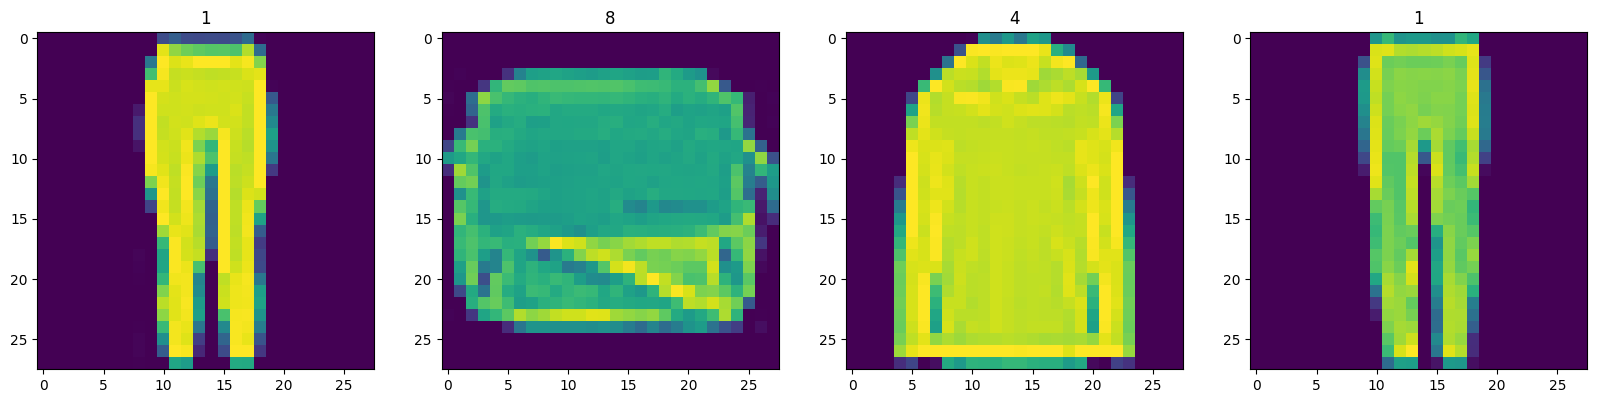

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx in range(4):
  sample = dataiterator.next()
  ## plotting image for a specific subplot
  ax[idx].imshow(np.squeeze(sample['image']))
  ## Appending the image along with their label
  ax[idx].title.set_text(sample['label'])


In [14]:
## scale and return images only
def scale_images(data):
  image=data['image']
  return image/255

map
cache
shuffle
batch
prefetch

Mc shbap



In [15]:
## Reloading the dataset
ds = tfds.load('fashion_mnist', split= 'train')
## runnign the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
## Cache the dataset for that batch
ds = ds.cache()
## shuffling it up
ds = ds.shuffle(60000)
## batch into 128 images per sample
ds = ds.batch(128)
## reduced the liklihood of bottlenecking
ds = ds.prefetch(64)

In [16]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Building the neural networks

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [40]:
## BUilding the generator

def build_generator():
    model = Sequential()
    
      # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128 , input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    model.summary()
    
    return model

In [41]:
generator = build_generator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [42]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [43]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 264ms/step


In [44]:
img

array([[[[0.49737528],
         [0.49670544],
         [0.50323635],
         ...,
         [0.49820182],
         [0.4985401 ],
         [0.49551392]],

        [[0.50179577],
         [0.4918291 ],
         [0.48355812],
         ...,
         [0.50052214],
         [0.5051287 ],
         [0.4984437 ]],

        [[0.49475855],
         [0.48931676],
         [0.49200183],
         ...,
         [0.5078511 ],
         [0.507109  ],
         [0.49887952]],

        ...,

        [[0.49244884],
         [0.48347214],
         [0.49140024],
         ...,
         [0.49486345],
         [0.49680495],
         [0.50021756]],

        [[0.49242064],
         [0.48841357],
         [0.48657325],
         ...,
         [0.49553287],
         [0.49592483],
         [0.50003415]],

        [[0.49673533],
         [0.49195272],
         [0.49411488],
         ...,
         [0.50070536],
         [0.50183403],
         [0.5022357 ]]],


       [[[0.49896684],
         [0.49199015],
         [0.49

In [45]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 99ms/step


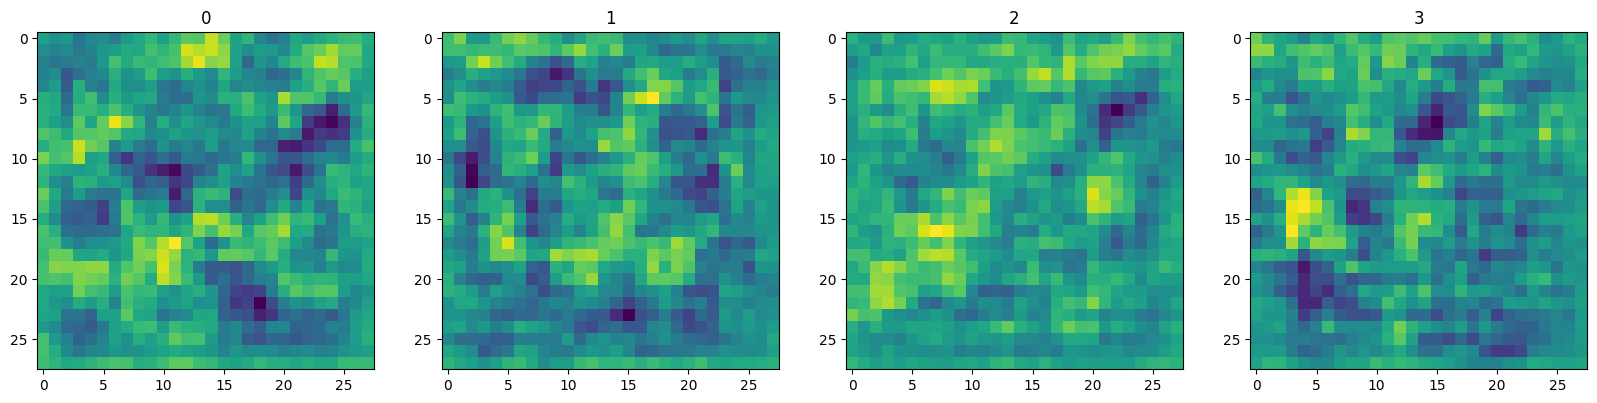

In [46]:
img = generator.predict(np.random.randn(4,128,1))

fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img1 in enumerate(img):

  ## plotting image for a specific subplot
  ax[idx].imshow(np.squeeze(img1))
  ## Appending the image along with their label
  ax[idx].title.set_text(idx)


In [47]:
## Building a discriminator now

def build_discriminator():
  model = Sequential()

  # conv block 1
  model.add(Conv2D(32,5,input_shape= (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  ## fOURTH conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [48]:
discriminator = build_discriminator()

In [49]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)      

In [50]:
discriminator.predict(img)

1/1 [==============================] - 0s 150ms/step


array([[0.49433568],
       [0.49437216],
       [0.4946183 ],
       [0.49453497]], dtype=float32)

## Training the generator and the discriminator

In [51]:
 from tensorflow.keras.optimizers import Adam
 from tensorflow.keras.losses import BinaryCrossentropy

In [52]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [53]:
## Building the subclassed Model

from tensorflow.keras.models import Model


In [54]:
class FashionGan(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    ## Creating attributes for gen and discr
    self.generator = generator
    self.discriminator = discriminator


  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    #compiling with base class
    super().compile(*args, **kwargs)

    ## creating attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss


  def train_step(self,batch):
    #getting the data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training = False)

    ## Training the discriminator
    with tf.GradientTape() as d_tape:
    #1. Pass the real and fake images to the discriminator model
      yhat_real = self.discriminator(real_images, training = True)
      yhat_fake = self.discriminator(fake_images, training = True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

    #2. Create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis= 0)

    #3. Add some noise to the True ouptus
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis=0)

    #4. Calculate the loss
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)


    #5. apply backpropagation
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))


    ## Training the generator now
    with tf.GradientTape() as g_tape:
      #1. Generate some new images
      gen_images = self.generator(tf.random.normal((128,128,1)), training = True)
      #2. Create the predicted labels
      predicted_labels = self.discriminator(gen_images, training = False)
      #3. Calculate loss
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    #4. Apply backprop
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [55]:
fashgan = FashionGan(generator, discriminator)

In [56]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [57]:
## Building callback
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [58]:
class ModelMonitor(Callback):
  def __init__(self,num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch, logs = None):
    random_latent_vectors = tf.random.uniform((self.num_img, self,latent_dim, 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_images):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images', f"generated_img_{epoch}_{i}.png"))

In [ ]:
#training
## Recommended 2000 epoch
hist = fashgan.fit(ds, epochs = 20, callbacks = [ModelMonitor()])

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()

In [ ]:
## Testing out the generator

img = generator.predict(tf.random.normal((16,128,1)))


In [ ]:
fig,ax = plt.subplots(ncols = 4, nrows = 4, figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1) -1])